In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
!ls

1.jpg  find_cordinates.py		 update_sign_on_id.ipynb
3.jpg  id_card_with_black_signature.jpg


In [3]:
!pwd

/home/ml1/Documents/BootCamp_ML1/day7


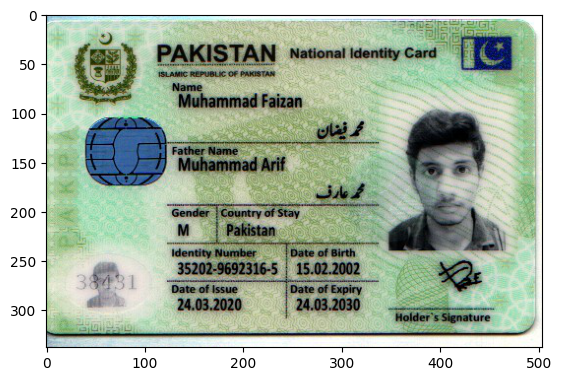

In [6]:

# import required libraries
import cv2
import numpy as np

# Read an input image as a gray image
image = cv2.imread('/home/ml1/Documents/BootCamp_ML1/day7/3.jpg')
#plt.imread()
plt.imshow(image)




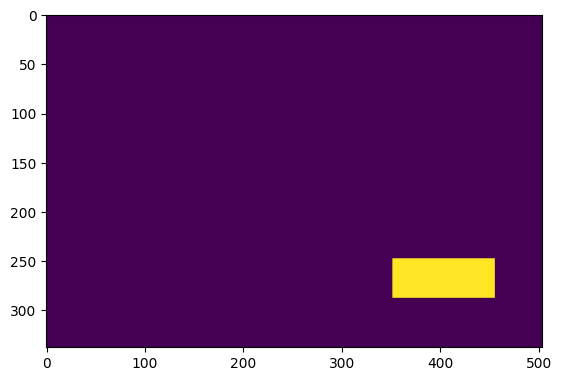

In [7]:
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (352, 248), (455, 287), 255, -1)
plt.imshow(mask)


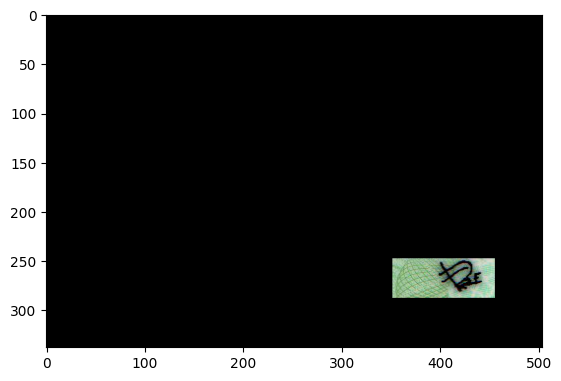

In [8]:
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)

# display the mask, and the output image
plt.imshow(masked)

In [9]:
inpainted_image_telea = cv2.inpaint(image, mask, inpaintRadius=4, flags=cv2.INPAINT_TELEA)
inpainted_image_ns = cv2.inpaint(image, mask, inpaintRadius=4, flags=cv2.INPAINT_NS)

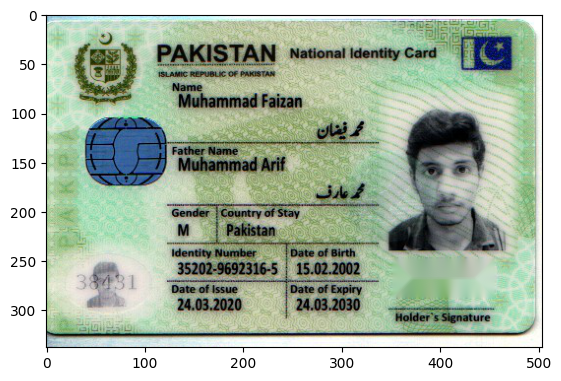

In [10]:
plt.imshow(inpainted_image_telea)

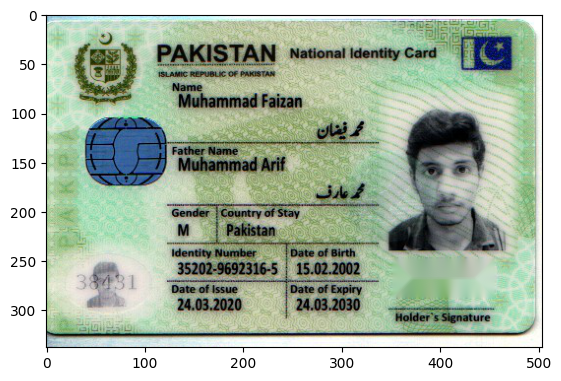

In [11]:
plt.imshow(inpainted_image_telea)

In [12]:
img = cv2.imread('/home/ml1/Documents/BootCamp_ML1/day7/1.jpg', 0) # Load as grayscale

# Apply Canny edge detection
edges = cv2.Canny(img, 100, 50) # Adjust thresholds as needed


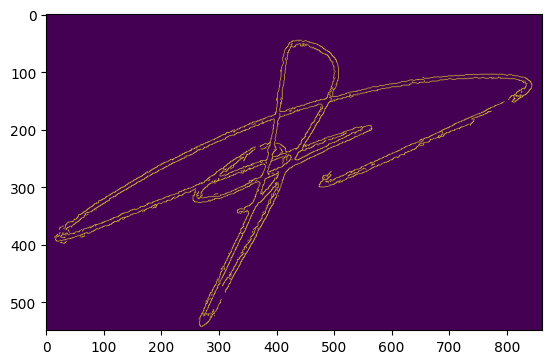

In [13]:
plt.imshow(edges)

In [14]:
type(edges)

numpy.ndarray

In [15]:
unique_values, counts = np.unique(edges, return_counts=True)

In [16]:
unique_values

array([  0, 255], dtype=uint8)

In [17]:
counts

array([464608,   8630])

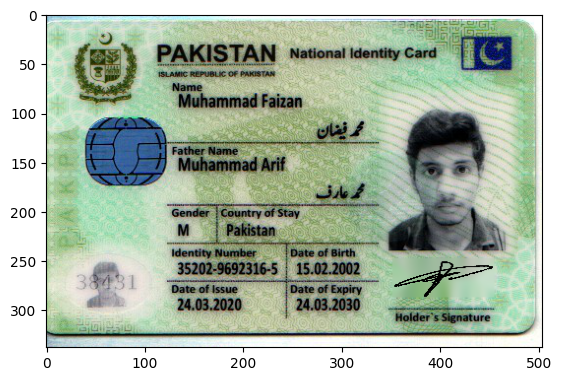

In [31]:
def blend_signature(id_card, signature, y1, y2, x1, x2):
    """Blend black signature (edges) onto ID card with transparent background"""
    # Resize signature to target area
    target_height = y2 - y1
    target_width = x2 - x1
    resized_sig = cv2.resize(signature, (target_width, target_height))
    
    # Invert edges (black signature on white background)
    inverted_edges = cv2.bitwise_not(resized_sig)  # Now edges=0 (black), background=255 (white)
    
    # Convert to 4-channel BGRA (to support transparency)
    sig_bgra = cv2.cvtColor(inverted_edges, cv2.COLOR_GRAY2BGRA)
    
    # Set alpha channel: 
    # - Where edges are black (0), alpha=1 (fully opaque)
    # - Where background is white (255), alpha=0 (fully transparent)
    alpha = 1.0 - (inverted_edges / 255.0)  # Normalize and invert
    sig_bgra[:, :, 3] = (alpha * 255).astype(np.uint8)  # Apply alpha
    
    # Blend using the alpha channel
    roi = id_card[y1:y2, x1:x2]
    for c in range(3):
        roi[:, :, c] = sig_bgra[:, :, c] * alpha + roi[:, :, c] * (1 - alpha)
    
    return id_card

# Load image as grayscale
img = cv2.imread('/home/ml1/Documents/BootCamp_ML1/day7/1.jpg', 0)  

# Apply Canny edge detection (edges=white, background=black)
#edges = cv2.Canny(img, 100, 50) 

#Apply Canny edge detection (edges=white, background=black)
edges = cv2.Canny(img, 50, 50)  

kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=8)

# Ensure ID card is in BGR format (not grayscale)
if len(inpainted_image_telea.shape) == 2:
    inpainted_image_telea = cv2.cvtColor(inpainted_image_telea, cv2.COLOR_GRAY2BGR)

# Blend signature onto ID card
result = blend_signature(inpainted_image_telea.copy(), edges, sig_y1, sig_y2, sig_x1, sig_x2)

# Display or save result
plt.imshow(result)

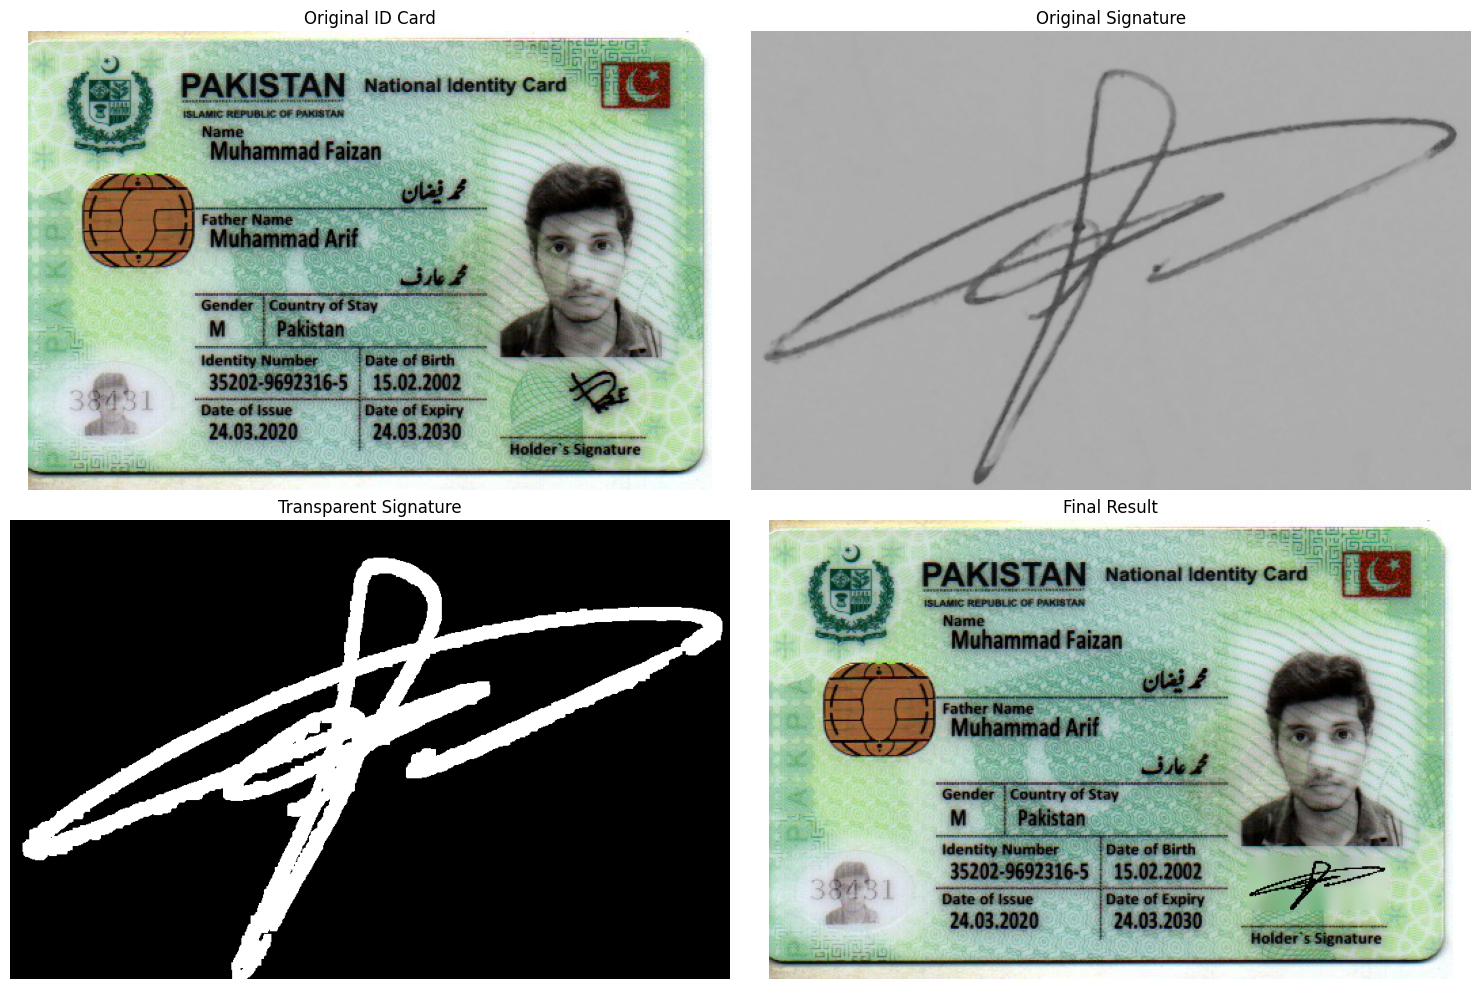

Saved modified ID card!


In [32]:
# 5. Display Results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original ID Card")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Signature")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGRA2RGBA))
plt.title("Transparent Signature")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Final Result")
plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Save Result
cv2.imwrite("/kaggle/working/modified_id.jpg", result)
print("Saved modified ID card!")